本次分析的主要目的：NBA球员的防守表现是否比进攻表现更适合更适合用来预测球员的RPM?(Is an NBA player's defensive performance better suited to predict that  player's RPM , than their offensive performance?)。

原文所用数据是2016-2017赛季342位球员的统计数据，各项统计指标如下：

![](https://tva1.sinaimg.cn/large/006y8mN6ly1g82eltfpxpj30u01lpdu0.jpg)

real plus minus 翻译过来应该是真实正负值，具体怎么计算自己还没有搞明白，应该是用来衡量球员表现的一个很重要的指标，比如昨天火箭对骑士的比赛，保罗14投8中，三分9中6，高效拿下22分8篮板11助攻的准三双表现，在场正负值高达+47，不知道这个real plus minus（RPM）和我们平时看比赛时听到的正负值是不是同一个指标。

分析的第一步是简单的用回归散点图来看一下球员的RPM与出场时间是否有关系，代码

In [1]:
import os # 导入 OS 模块，为了更改路径
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

os.chdir("./") # 切换目录


player_df = pd.read_csv("nba_2017_nba_players_with_salary.csv")

player_df.head()

,Unnamed: 0,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,...,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS
0,0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,...,81,34.6,6.74,-0.47,6.27,17.34,23.0,102.31,46,26.50
1,1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,...,81,36.4,6.38,-1.57,4.81,15.54,19.0,102.98,54,26.50
2,2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,...,76,33.8,5.72,-3.89,1.83,8.19,16.1,99.84,51,6.59
3,3,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,...,75,36.1,0.45,3.90,4.35,12.81,19.2,100.19,31,22.12
4,4,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,...,72,34.2,3.56,0.64,4.20,11.26,17.8,97.11,30,16.96


In [2]:
plt.figure(figsize=(15,7))

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

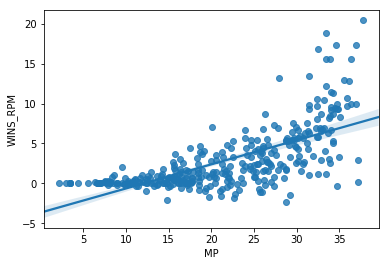

In [4]:
sns.regplot(x="MP",y="WINS_RPM",data=player_df)
plt.show()

通过这张图可以看出出场时间和RPM之间有一定的相关性，接下来又绘制了球员出场时间按场上位置分组的散点图，目的是看一下是否可以提供额外的参考信息，代码

/Users/lw/anaconda3/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


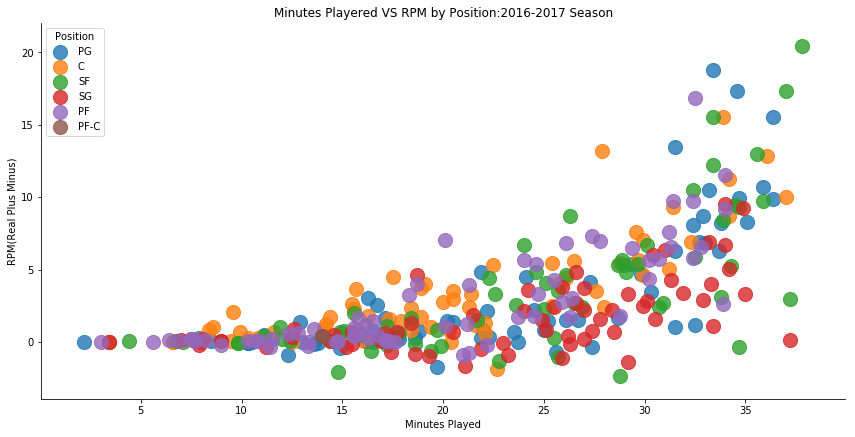

In [5]:
ax = sns.lmplot(x='MP',y='WINS_RPM',data=player_df,
                hue='POSITION',fit_reg=False,size=6,aspect=2,legend=False,scatter_kws={"s":200})

ax.set(xlabel='Minutes Played',ylabel='RPM(Real Plus Minus)',title="Minutes Playered VS RPM by Position:2016-2017 Season")

plt.legend(loc='upper left',title='Position')

plt.show()

从图中可以看出一个很有意思的现象，RPM值比较高的第一梯队中，几乎没有得分后卫，小前锋和组织后卫居多，只有一位大前锋，看来现在真的是得分后卫凋零的时代呀，是不是非常怀念当年的西科东艾，北卡南麦的时代呢！

今天就先到这里啦，后面还有很多有意思的分析和可视化，争取python代码实现以后再用R语言重复一遍。